In [1]:
import librosa
import numpy as np
import seaborn as sns
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
SR = 48000
NFFT = 512
HOP = 64
SIG_LIM = 2 ** 14 - HOP

In [3]:
signal, _ = librosa.load("dataset/ac_gtr/08_Gtr_G_S_3.wav", mono=True, sr=SR)
signal = signal[:SIG_LIM]
print(signal.shape)
ipd.Audio(signal, rate=SR)

(16320,)


In [4]:
stft = librosa.stft(signal, n_fft=NFFT, hop_length=HOP)
print(stft.shape)
print(stft[:-1].shape)
istft = librosa.istft(stft[:-1], n_fft=NFFT, hop_length=HOP)
print(istft.shape)
ipd.Audio(istft, rate=SR)

(257, 256)
(256, 256)
(16320,)


In [5]:
abs_stft = np.abs(stft[:-1])
print(abs_stft.shape)
angle_stft = np.angle(stft[:-1])
print(angle_stft.shape)
print(f"Abs: {np.min(abs_stft)}, {np.max(abs_stft)}")
print(f"Angle: {np.min(angle_stft)}, {np.max(angle_stft)}")

(256, 256)
(256, 256)
Abs: 2.6914929094346007e-06, 68.72782135009766
Angle: -3.1415176391601562, 3.141592502593994


4.2445993


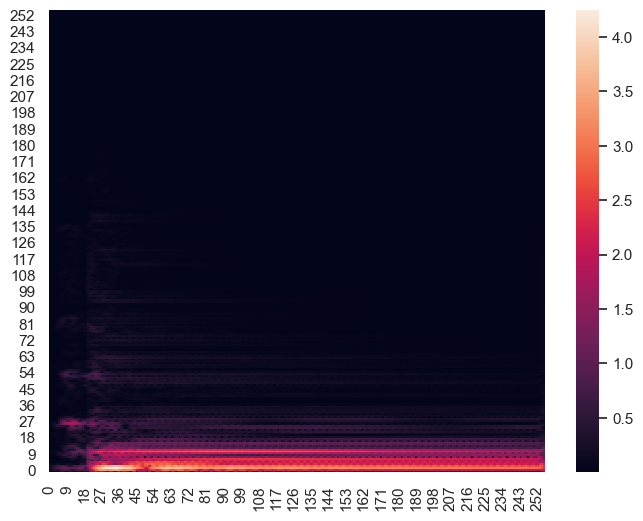

In [6]:
abs_log_scaled = np.log1p(abs_stft)
print(np.max(abs_log_scaled))
sns.set_theme(rc={"figure.figsize": (8, 6)})
ax = sns.heatmap(abs_log_scaled)
ax.invert_yaxis()
plt.show()

In [7]:
conv_stft = abs_stft * (np.cos(angle_stft) + 1j*np.sin(angle_stft))

In [8]:
conv_istft = librosa.istft(conv_stft, n_fft=NFFT, hop_length=HOP)
print(conv_istft.shape)
ipd.Audio(conv_istft, rate=SR)

(16320,)


In [9]:
print(np.min(librosa.power_to_db(abs_stft)),
      np.max(librosa.power_to_db(abs_stft)))

-55.70007 18.371326


18.371326 -55.70007


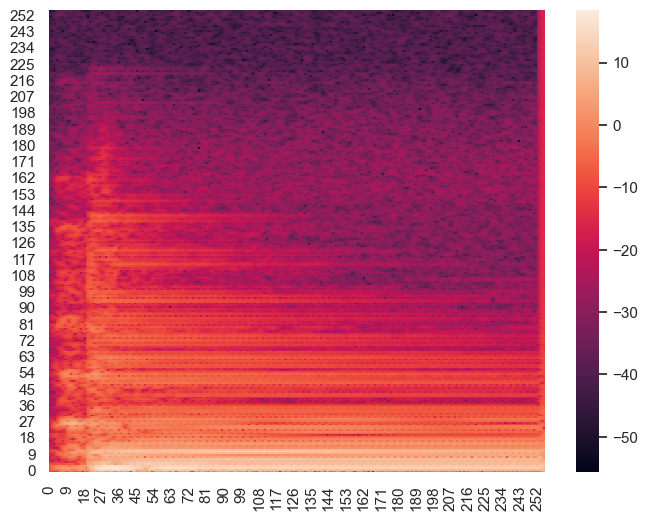

In [11]:
sns.set_theme(rc={"figure.figsize": (8, 6)})
db = librosa.power_to_db(abs_stft)
print(np.max(db), np.min(db))
ax = sns.heatmap(db)
ax.invert_yaxis()
plt.show()

0.0 1.0


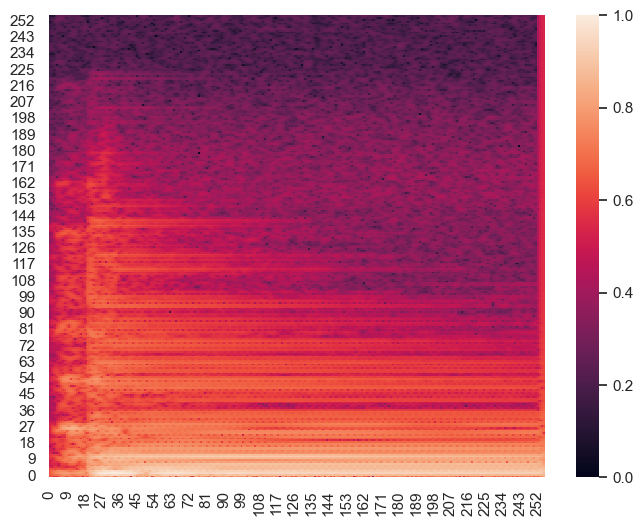

In [11]:
abs_db = librosa.power_to_db(abs_stft)
min_max_abs_db = (abs_db - np.min(abs_db)) / (np.max(abs_db) - np.min(abs_db))
print(np.min(min_max_abs_db), np.max(min_max_abs_db))
sns.set_theme(rc={"figure.figsize": (8, 6)})
ax = sns.heatmap(min_max_abs_db)
ax.invert_yaxis()
plt.show()

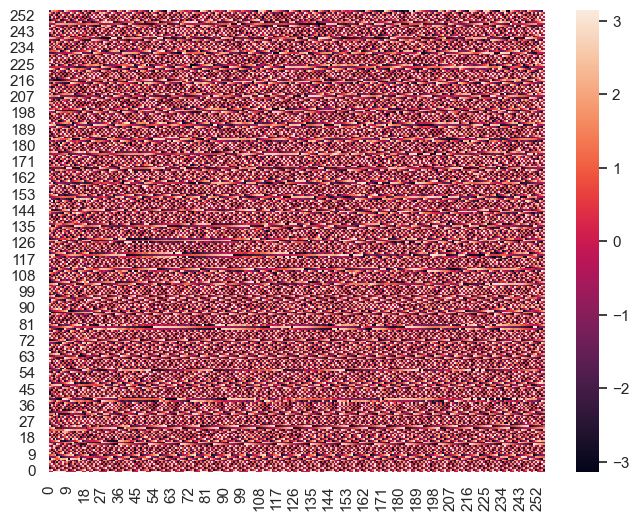

In [12]:
sns.set_theme(rc={"figure.figsize": (8, 6)})
ax = sns.heatmap(angle_stft)
ax.invert_yaxis()
plt.show()

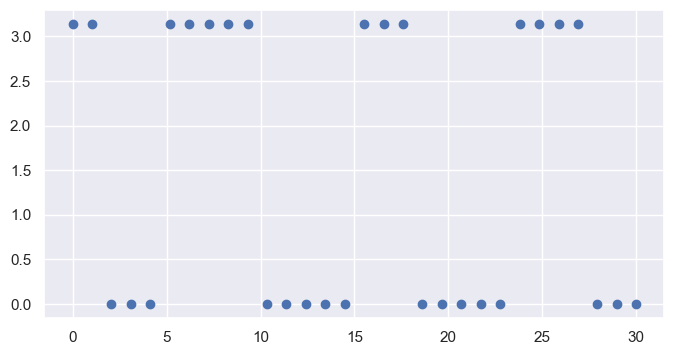

In [14]:
plt.figure(figsize=(8, 4))
start = 80
end = 110
x = np.linspace(0, end-start, end-start)
plt.scatter(x, angle_stft.reshape(-1)[start:end])
plt.show()

In [15]:
real_stft = np.real(stft[:-1])
print(real_stft.shape)
imag_stft = np.imag(stft[:-1])
print(imag_stft.shape)
print(f"Real: {np.min(real_stft)}, {np.max(real_stft)}")
print(f"Imag: {np.min(imag_stft)}, {np.max(imag_stft)}")

(256, 256)
(256, 256)
Real: -67.08139038085938, 64.09780883789062
Imag: -66.5523452758789, 65.87421417236328


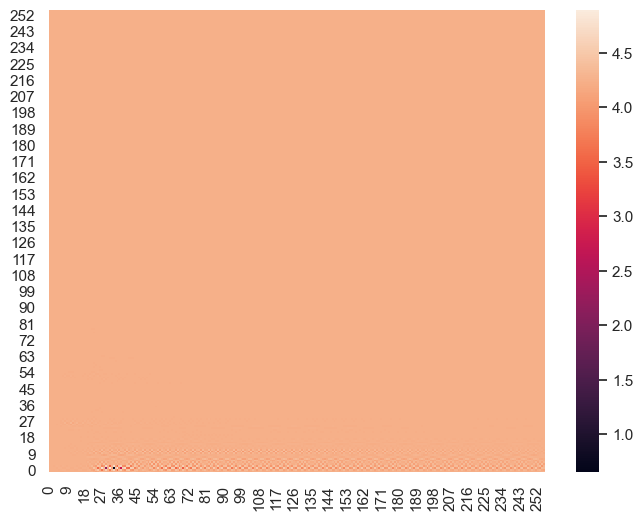

In [18]:
sns.set_theme(rc={"figure.figsize": (8, 6)})
ax = sns.heatmap(np.log1p(real_stft + 68))
ax.invert_yaxis()
plt.show()

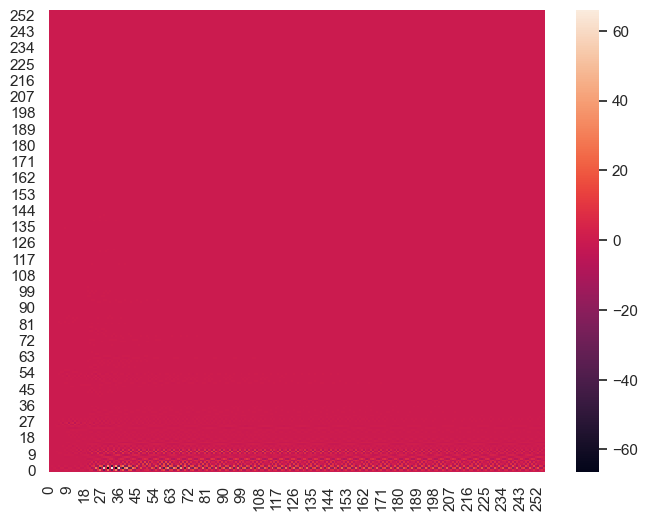

In [23]:
sns.set_theme(rc={"figure.figsize": (8, 6)})
ax = sns.heatmap(imag_stft)
ax.invert_yaxis()
plt.show()

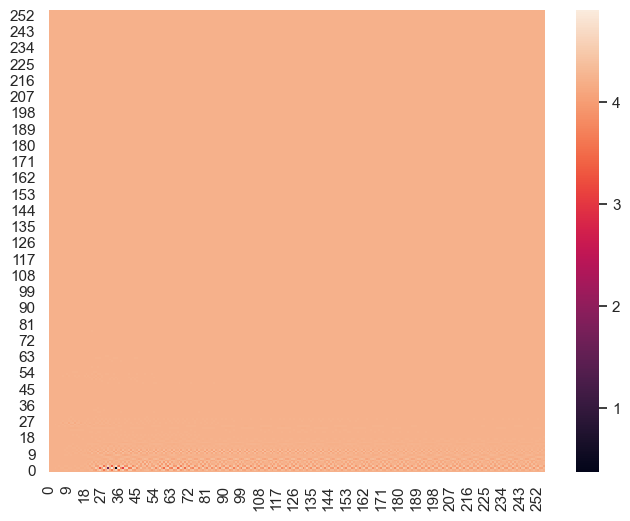

In [19]:
sns.set_theme(rc={"figure.figsize": (8, 6)})
ax = sns.heatmap(np.log1p(imag_stft + 67))
ax.invert_yaxis()
plt.show()